# Test Taylor diagram from SkillMetrics

In [1]:
'''
How to create a simple Taylor diagram

A first example of how to create a simple Taylor diagram given one set of
reference observations and multiple model predictions for the quantity.
The Python code is kept to a minimum.

This example shows how to calculate the required statistics and produce
the Taylor diagram.

All functions in the Skill Metrics library are designed to only work with
one-dimensional arrays, e.g. time series of observations at a selected
location. The one-dimensional data are read in as dictionaries via a
pickle file: ref['data'], pred1['data'], pred2['data'],
and pred3['data']. The plot is written to a file in Portable Network
Graphics (PNG) format.

The reference data used in this example are cell concentrations of a
phytoplankton collected from cruise surveys at selected locations and
time. The model predictions are from three different simulations that
have been space-time interpolated to the location and time of the sample
collection. Details on the contents of the dictionary (once loaded) can
be obtained by simply executing the following two statements

>> key_to_value_lengths = {k:len(v) for k, v in ref.items()}
>> print key_to_value_lengths
{'units': 6, 'longitude': 57, 'jday': 57, 'date': 57, 'depth': 57,
'station': 57, 'time': 57, 'latitude': 57, 'data': 57}

Author: Peter A. Rochford
        Symplectic, LLC
        www.thesymplectic.com

Created on Dec 3, 2016

@author: prochford@thesymplectic.com
'''

import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pickle
import skill_metrics as sm
from sys import version_info

In [2]:
def load_obj(name):
    # Load object from file in pickle format
    if version_info[0] == 2:
        suffix = 'pkl'
    else:
        suffix = 'pkl3'

    with open(name + '.' + suffix, 'rb') as f:
        return pickle.load(f) # Python2 succeeds

In [3]:
class Container(object):

    def __init__(self, pred1, pred2, pred3, ref):
        self.pred1 = pred1
        self.pred2 = pred2
        self.pred3 = pred3
        self.ref = ref

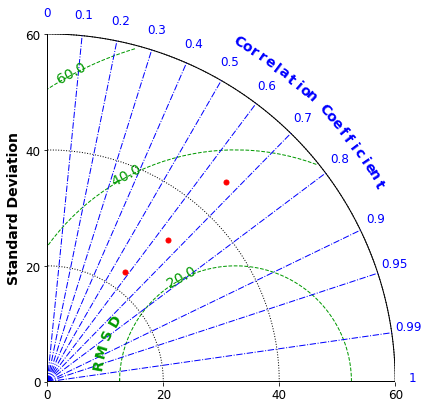

In [4]:
if __name__ == '__main__':

    # Set the figure properties (optional)
    rcParams["figure.figsize"] = [8.0, 6.4]
    rcParams['lines.linewidth'] = 1 # line width for plots
    rcParams.update({'font.size': 12}) # font size of axes text

    # Close any previously open graphics windows
    # ToDo: fails to work within Eclipse
    plt.close('all')

    # Read data from pickle file
    data = load_obj('/home/tomast/data/src/python/SkillMetrics/Examples/taylor_data')

    # Calculate statistics for Taylor diagram
    # The first array element (e.g. taylor_stats1[0]) corresponds to the
    # reference series while the second and subsequent elements
    # (e.g. taylor_stats1[1:]) are those for the predicted series.
    taylor_stats1 = sm.taylor_statistics(data.pred1,data.ref,'data')
    taylor_stats2 = sm.taylor_statistics(data.pred2,data.ref,'data')
    taylor_stats3 = sm.taylor_statistics(data.pred3,data.ref,'data')

    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1],
                     taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1],
                      taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1],
                      taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

    '''
    Produce the Taylor diagram

    Note that the first index corresponds to the reference series for
    the diagram. For example sdev[0] is the standard deviation of the
    reference series and sdev[1:4] are the standard deviations of the
    other 3 series. The value of sdev[0] is used to define the origin
    of the RMSD contours. The other values are used to plot the points
    (total of 3) that appear in the diagram.

    For an exhaustive list of options to customize your diagram,
    please call the function at a Python command line:
    >> taylor_diagram
    '''
    sm.taylor_diagram(sdev,crmsd,ccoef)

    # Write plot to file
    plt.savefig('taylor1.png')

    # Show plot
    plt.show()